# Web3: Scraping Web Data

In [ ]:
# Warmup 0
import requests

# The documentation is only 1 page!
# https://beautiful-soup-4.readthedocs.io/en/latest/
from bs4 import BeautifulSoup

### Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

#### Warmup 1a: Add another row.

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

In [ ]:
# Warmup 1b: Does indentation matter?

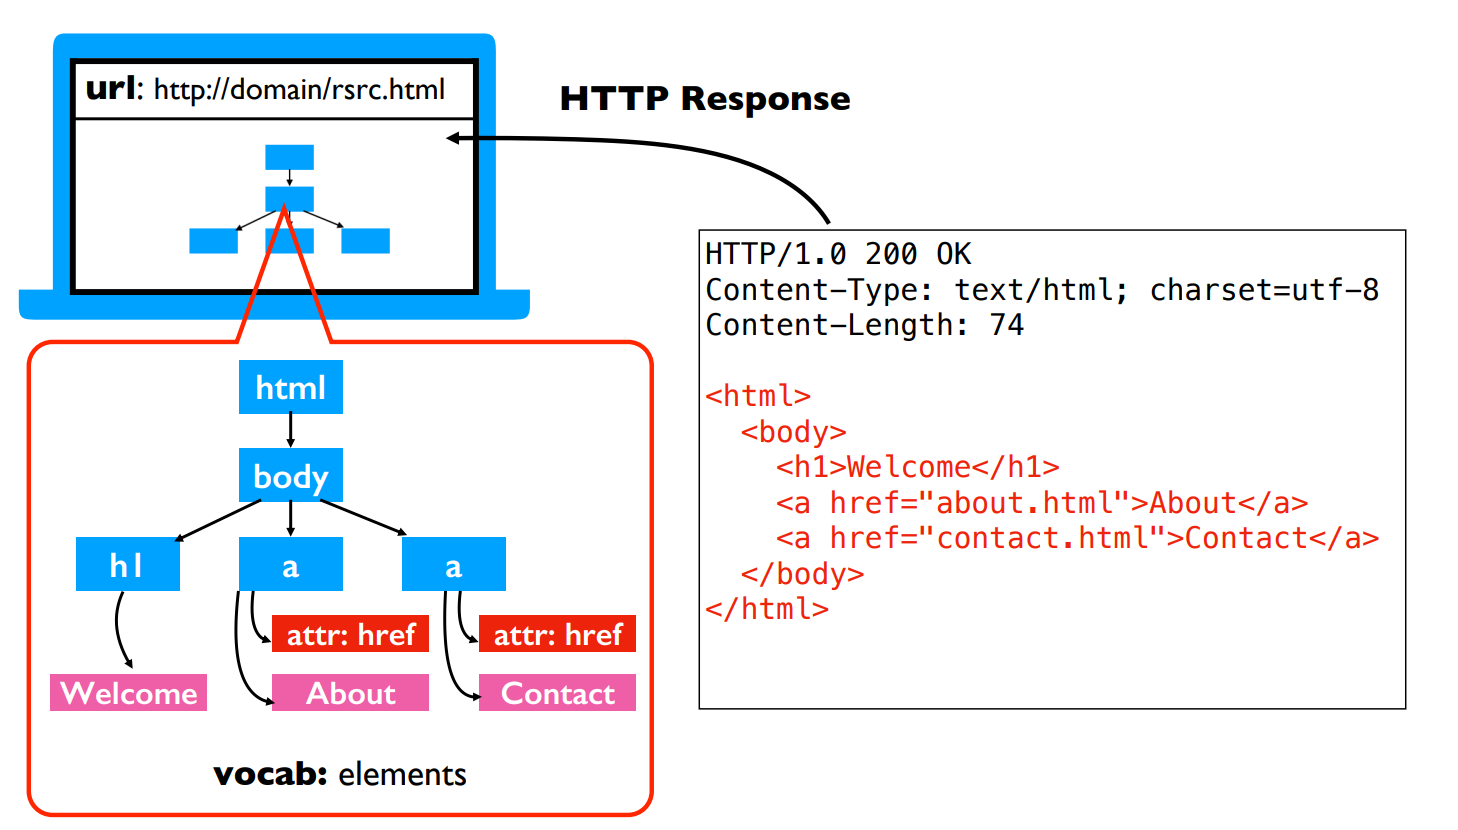

In [ ]:
# Warmup 1c: Consider the following HTML...
# <a href="https://www.google.com/"><b>Google</b> It</a>

# DOM stands for...
# An HTML page looks like a...
# <b>Google</b> is an...
# href is an...
# "It" is...

<a href="https://www.google.com/"><b>Google</b> It</a>

In [ ]:
# Warmup 2: GET Syllabus Information
# Get this page using requests.  
url = "https://www.msyamkumar.com/cs220/s22/syllabus.html"

# make sure there is no error


# read the entire contents of the page into a single string variable


# split the contents into list of strings using newline separator


#### Warmup 2a: Find all sentences that contain "Meena"

In [ ]:
meena_sentences = ???
meena_sentences

#### Warmup 2b: Extract title tag's value

In [ ]:
title_tag_val = ???

### Learning Objectives:

- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods 'find' and 'find_all' to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using get_text(), children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
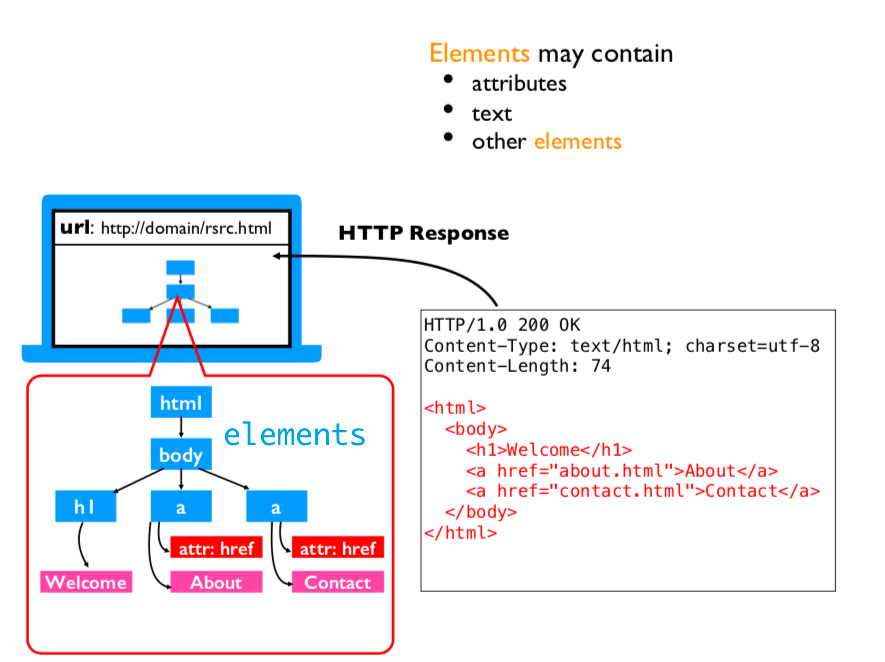
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes html and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

In [ ]:
html_string = "<b>To Do List</b><ul><li>Eat Healthy</li><li>Sleep <b>More</b></li><li>Exercise</li></ul>"
bs_obj = BeautifulSoup(html_string, "html.parser") 

type(bs_obj)

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

`prettify()` returns a formatted representation of the raw HTML

In [ ]:
print(bs_obj.prettify())

`find` returns the first HTML 'tag' matching the string "b"

In [ ]:
element = bs_obj.find("b")
element

What is the type of find's return value?

In [ ]:
print(type(element))

How do we extract the text of the "b" element and what is its type?

In [ ]:
text = element.get_text()
print(text, type(text))

`find` returns None if it cannot find that element.

In [ ]:
# assert that this html string has a <ul> tag
assert bs_obj.find("ul") != None

In [ ]:
# assert that this does not have an <a> tag
assert bs_obj.find("a") == None

`find_all` returns an iterable of all matching elements (HTML 'tags')

In [ ]:
# Find all bold elements
element_list = ???

In [ ]:
# What is the type of return value of find_all?


In [ ]:
# What about a single element?


In [ ]:
# Use a for loop to print the text of each "b" element.


Unlike `find`, `find_all` returns an empty iterable, when there are no matching elements.

In [ ]:
# only searches for elements, not text
print(bs_obj.find_all("Sleep"))    

In [ ]:
# if not present returns None
print(bs_obj.find("Sleep"))    

You can invoke `find` or `find_all` on other BeautifulSoup object instances.

In [ ]:
# Find all list elements


In [ ]:
# Find all bold list items


DOM trees are hierarchical. You can use `.children` on any element to gets its children.

In [ ]:
# Find all children of the unordered list.


In [ ]:
# Find text of every child element.


Notice that `get_text()` only returns the actual text and not the HTML formatting.

In [ ]:
# You Try! Print all bolded list items.
for li_item in bs_obj.find("ul").children:
    pass

In [ ]:
# You Try! Get the title of the Syllabus Page using Beautiful Soup

# Get this page using requests.  
url = "https://www.msyamkumar.com/cs220/s22/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# use BeautifulSoup to extract title
syllabus_obj = ???

In [ ]:
# You Try! Use Beautiful Soup to get all the main
# ideas (h1 and h2's) from the Beautiful Soup documentation.
# https://beautiful-soup-4.readthedocs.io/en/latest/
# Get this page using requests.  
url = "https://beautiful-soup-4.readthedocs.io/en/latest/"


New syntax, you can use `"""some really long string"""` to split a string across multiple lines.

In [ ]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>
"""

In [ ]:
# Get all the table headers
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = ???

In [ ]:
# Get the first anchor element
first_anchor = ???

You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

In [ ]:
# Get the attributes of the first anchor object
first_anchor_attributes = ???

In [ ]:
# What is the type of .attrs?


In [ ]:
# Extract the hyperlink


In [ ]:
# Extract hyperlinks for each department and populate
# department name and link into a dict where the key
# is the department name, and the value is the URL.
department_urls = {}
tr_elements = bs_obj.find_all("tr")

for tr in tr_elements:
    if tr.find("td") != None: # this should handle row containing th's
        pass
        
department_urls

## Parsing small_movies html table to extract `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

In [ ]:
f = open("small_movies.html")
small_movies_str = f.read()
f.close()
# small_movies_str

### Step 2: Initialize BeautifulSoup object instance

In [ ]:
bs_obj = BeautifulSoup(small_movies_str, "html.parser")
# bs_obj

### Step 3: Find table element

In [ ]:
table = bs_obj.find("table") # works only when you have exactly 1 table
# table

### Step 4: Find all th tags, to parse the table header

In [ ]:
header = [th.get_text() for th in table.find_all('th')]
# header

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

In [ ]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [ ]:
# Why second row? Because first row has the header information.

movie = {}

tr_elements = table.find_all('tr')
tr = tr_elements[1]
td_elements = tr.find_all('td')
for idx in range(len(td_elements)):
    td = td_elements[idx]
    val = td.get_text()
    if header[idx] in ["Year", "Runtime"]:
        movie[header[idx]] = int(val)
    elif header[idx] == "Revenue":
        revenue = format_revenue(val)
        movie[header[idx]] = revenue
    elif header[idx] == "Rating":
        movie[header[idx]] = float(val)
    else:
        movie[header[idx]] = val
    
movie

### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

You can compare your parsing output to `small_movies.json` file contents, to confirm your result.

In [ ]:
movies_data = []

tr_elements = table.find_all('tr')
for tr in tr_elements[1:]: # Skip first row (header row)
    td_elements = tr.find_all('td')
    movie = {}
    for idx in range(len(td_elements)):
        td = td_elements[idx]
        val = td.get_text()
        if header[idx] in ["Year", "Runtime"]:
            movie[header[idx]] = int(val)
        elif header[idx] == "Revenue":
            revenue = format_revenue(val)
            movie[header[idx]] = revenue
        elif header[idx] == "Rating":
            movie[header[idx]] = float(val)
        else:
            movie[header[idx]] = val
    movies_data.append(movie)
# movies_data

### Final step: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [ ]:
def parse_html(html_file):
    f = open(html_file)
    small_movies_str = f.read()
    f.close()

    bs_obj = BeautifulSoup(small_movies_str, "html.parser")
    
    table = bs_obj.find("table") # works only when you have exactly 1 table
    header = [th.get_text() for th in table.find_all('th')]

    movies_data = []

    tr_elements = table.find_all('tr')
    for tr in tr_elements[1:]: # Skip first row (header row)
        td_elements = tr.find_all('td')
        movie = {}
        for idx in range(len(td_elements)):
            td = td_elements[idx]
            val = td.get_text()
            if header[idx] in ["Year", "Runtime"]:
                movie[header[idx]] = int(val)
            elif header[idx] == "Revenue":
                revenue = format_revenue(val)
                movie[header[idx]] = revenue
            elif header[idx] == "Rating":
                movie[header[idx]] = float(val)
            else:
                movie[header[idx]] = val
        movies_data.append(movie)
    
    return movies_data

In [ ]:
full_movies_data = parse_html("full_movies.html")
# full_movies_data